In [86]:
### use generate_graph() to transform adjeceny matrix to graph
import numpy as np
from graph_tools import *
def generate_graph(AM):
    d = Graph(directed=False)
    d.add_vertex(len(AM)-1)
    for i in range(len(AM)):
        for j in range(i,len(AM)):
            if AM[i][j]==1:
                d.add_edge(i,j)
    return d

In [87]:
from sympy.combinatorics import Permutation
def compose_permutation(p,g):
    p1=Permutation(p)
    q1=Permutation(g)
    return [(p1*q1)(i) for i in range(p1.size)]


In [88]:
def apply_permute(AM,pi):
    n=len(AM)
    AM1=np.zeros((n,n))
    for i in range (n):
        for j in range (n):
            if AM[i][j]==1 :
                AM1[pi[i]][pi[j]]=1
    return AM1


In [89]:
### find the inverse of permutation using inv()
def inv(perm):
    per=list(perm)
    inverse = [0] * len(per)
    for i, p in enumerate(per):
        inverse[p] = i
    return inverse

In [90]:
def are_equal(AM,AM1) :
    return np.array_equal(AM1,AM)

In [91]:
def graph_isomorphism(P,V):
    message_list=[]
    prover_move=True
    while len(message_list)<4:
        if prover_move :
            message_list=P(message_list)
        else :
            message_list=V(message_list)
        prover_move= not prover_move
        if message_list[-1]== 'Accept' or   message_list[-1]== 'Reject':
            return message_list
    return message_list

In [92]:
import math
def honest_prover(AM,AM1,pi,mess_list,s):
    n=len(AM)
    if len(mess_list)==0:
        np.random.seed(s)
        sigma =np.random.permutation(n)
        h=apply_permute(AM,sigma)
        mess_list.append(h)
    if len(mess_list)==2:
        np.random.seed(s)
        sigma =np.random.permutation(n)
        ch=mess_list[1]
        if ch==0:
            mess_list.append(sigma)
        else:
            p=inv(pi)
            mess_list.append(compose_permutation(p,list(sigma)))
    return mess_list

In [93]:
def honest_verifier(AM,AM1,mess_list):
    if len(mess_list)==1:
        ch=random.choice(range(2))
        mess_list.append(ch)
    if len(mess_list)==3: 
        phi=mess_list[2]
        ch=mess_list[1]
        H=mess_list[0]
        mess_list[0]=generate_graph(H)
        if ch==0 :
            H0=apply_permute(AM,phi)
        if ch==1:
            H0=apply_permute(AM1,phi)
        if are_equal(H,H0):
            mess_list.append('Accept')
        else:
            mess_list.append('Reject')
    return mess_list

In [94]:
def cheating_prover(AM, AM1, mess_list,s):
    n=len(AM)
    if len(mess_list)==0:
        np.random.seed(s)
        sigma =np.random.permutation(n)
        h=apply_permute(AM,sigma)
        mess_list.append(h)
    if len(mess_list)==2:
        np.random.seed(s)
        sigma =np.random.permutation(n)
        ch=mess_list[1]
        if ch==0:
            mess_list.append(sigma)
        else:
            mess_list.append(np.random.permutation(n))
    return mess_list

In [95]:
def test_isomorphism(AM, AM1, pi): 
    s=random.choice(range(1000))
    V=lambda msg: honest_verifier(AM,AM1,msg)
    P=lambda msg: honest_prover(AM,AM1,pi,msg,s)
    return graph_isomorphism(P,V)

In [96]:
def simulator(AM,AM1):
    mess_list=[]
    s=random.choice(range(1000))
    np.random.seed(s)
    sigma =np.random.permutation(len(AM))
    b=random.choice(range(2))
    if b==0:
        h=apply_permute(AM,sigma)
    if b==1:
        h=apply_permute(AM1,sigma)
    mess_list.append(generate_graph(h))
    ch=random.choice(range(2))
    mess_list.append(ch)
    if ch == b:
        mess_list.append(sigma)
        mess_list.append('Accept')
        return mess_list
    else :
        return simulator(AM,AM1)


In [97]:
def protocol_dishonest_prover(AM, AM1):
    s=random.choice(range(1000))
    V=lambda msg: honest_verifier(AM,AM1,msg)
    P=lambda msg: cheating_prover(AM,AM1,msg,s)
    return graph_isomorphism(P,V)

In [98]:
import csv
def get_graph_from_file(i):
    with open('matices.csv') as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    l=[]
    l=content[i]
    matrix=[]
    l[i]
    n=int(np.sqrt(len(l)-2))
    for i in range(1,len(l)-1):
        matrix.append(l[i])
    s=np.reshape(matrix,(n,n))
    return s

In [99]:
def get_pi_from_file(i):
    with open('matices.csv') as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    l=[]
    l=content[i]
    matrix=[]
    l[i]
    n=int(np.sqrt(len(l)-2))
    for i in range(1,len(l)-1):
        matrix.append(int(l[i]))
    return matrix

In [100]:
def equal(AM):
    a=np.zeros([len(AM),len(AM)])
    for i in range(len(AM)):
        for j in range(len(AM)):
            a[i][j]=AM[i,j]
    return a

In [101]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_graph(AM):
    G = nx.Graph()
    for i in range(len(AM)):
        for j in range(len(AM)):
            if AM[i][j]==1:
                G.add_edge(i, j)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()


In [102]:
M=get_graph_from_file(0)
AM=equal(M)
M1=get_graph_from_file(1)
AM1=equal(M1)
pi=get_pi_from_file(2)

##  Example between honest prover and honest verifier when ch=0

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


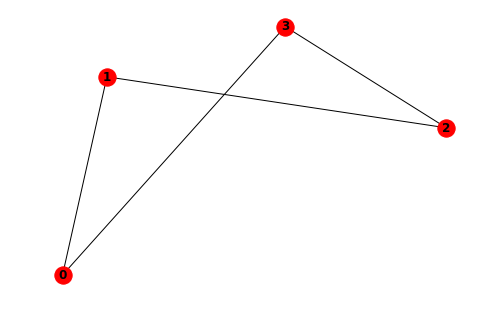

G_1 is


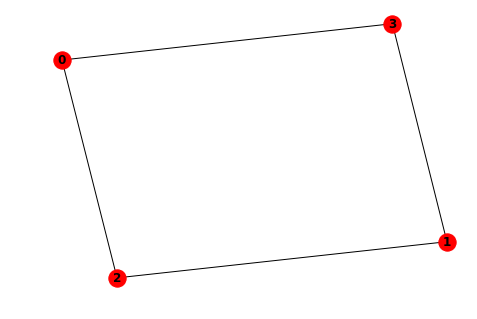

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/54/05/09/20 22:54:52
 // undirected, 4 vertices, 4 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "0" -- "1";
   "0" -- "3";
   "1" -- "2";
   "2" -- "3";
 }, 0, array([3, 0, 1, 2]), 'Accept']

In [105]:

print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
test_isomorphism(AM,AM1,pi)

##  Example between honest prover and honest verifier when ch=1

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


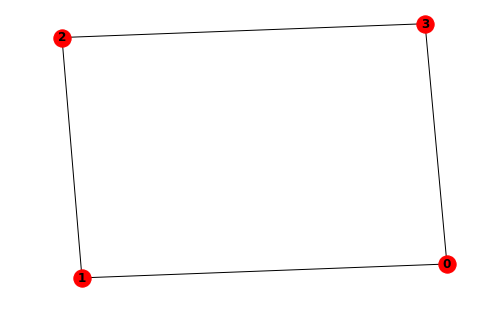

G_1 is


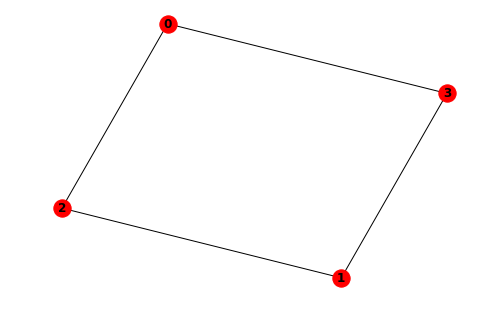

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/55/05/09/20 22:55:21
 // undirected, 4 vertices, 4 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "0" -- "1";
   "0" -- "3";
   "1" -- "2";
   "2" -- "3";
 }, 1, [0, 2, 1, 3], 'Accept']

In [109]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
test_isomorphism(AM,AM1,pi)

In [110]:
M1=get_graph_from_file(3)
AM1=equal(M1)

##  Example between cheating prover and honest verifier when ch=0

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


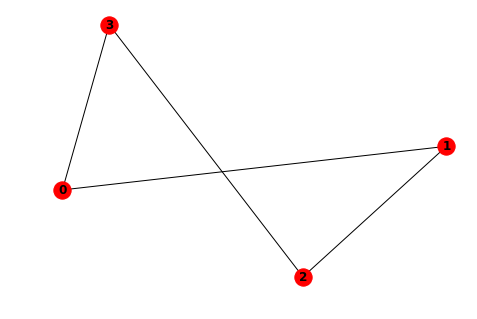

G_1 is


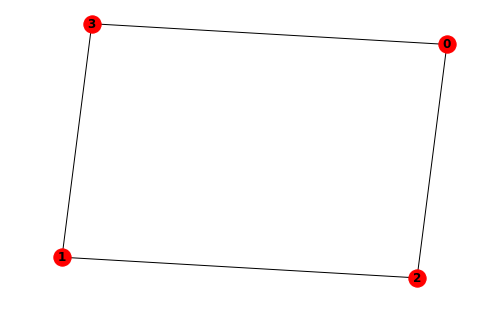

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/55/05/09/20 22:55:33
 // undirected, 4 vertices, 4 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "0" -- "2";
   "0" -- "3";
   "1" -- "2";
   "1" -- "3";
 }, 0, array([3, 0, 2, 1]), 'Accept']

In [111]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
protocol_dishonest_prover(AM,AM1)

##  Example between cheating prover and honest verifier when ch=1

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


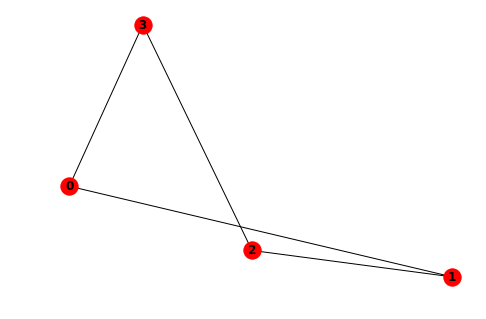

G_1 is


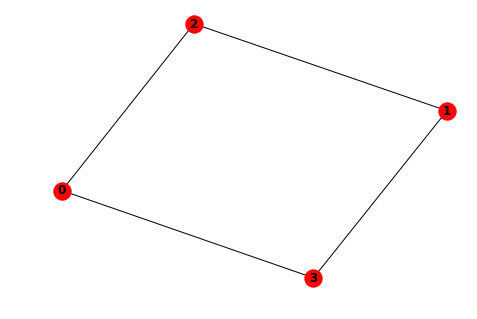

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/55/05/09/20 22:55:48
 // undirected, 4 vertices, 4 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "0" -- "2";
   "0" -- "3";
   "1" -- "2";
   "1" -- "3";
 }, 1, array([2, 3, 1, 0]), 'Reject']

In [112]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
protocol_dishonest_prover(AM,AM1)

In [113]:
M=get_graph_from_file(4)
AM=equal(M)
M1=get_graph_from_file(5)
AM1=equal(M1)
pi=get_pi_from_file(6)

##  Example between honest prover and honest verifier for big grapg(v=10,e=28)when ch=0

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


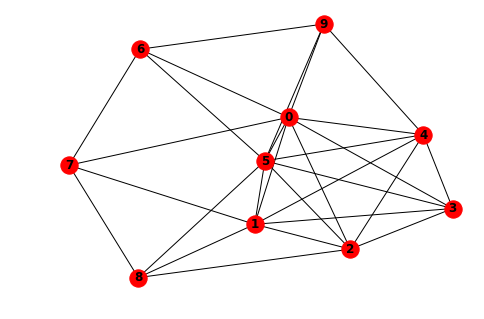

G_1 is


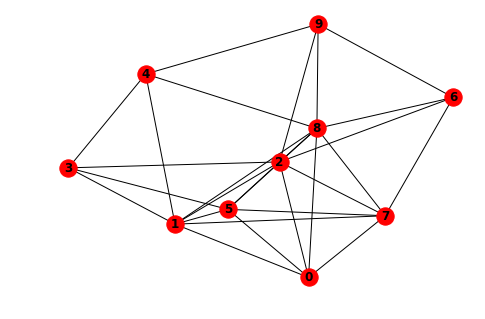

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/56/05/09/20 22:56:19
 // undirected, 10 vertices, 28 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "4";
   "5";
   "6";
   "7";
   "8";
   "9";
   "0" -- "1";
   "0" -- "4";
   "0" -- "6";
   "0" -- "8";
   "1" -- "3";
   "1" -- "5";
   "1" -- "8";
   "2" -- "3";
   "2" -- "4";
   "2" -- "5";
   "2" -- "7";
   "2" -- "8";
   "2" -- "9";
   "3" -- "4";
   "3" -- "5";
   "3" -- "6";
   "3" -- "7";
   "3" -- "8";
   "3" -- "9";
   "4" -- "6";
   "4" -- "7";
   "4" -- "8";
   "4" -- "9";
   "5" -- "8";
   "6" -- "9";
   "7" -- "8";
   "7" -- "9";
   "8" -- "9";
 }, 0, array([8, 4, 9, 7, 2, 3, 1, 0, 6, 5]), 'Accept']

In [116]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
test_isomorphism(AM,AM1,pi)

##  Example between honest prover and honest verifier for big grapg(v=10,e=28)when ch=1

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


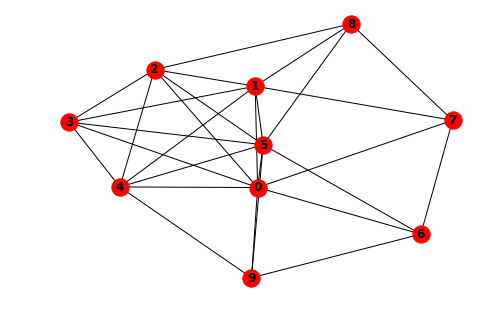

G_1 is


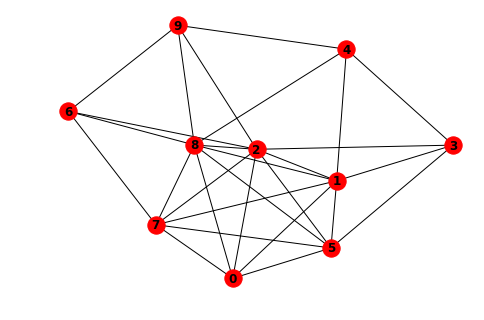

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[// Generated by graph-tools (version 1.0) at 2020/56/05/09/20 22:56:24
 // undirected, 10 vertices, 28 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "4";
   "5";
   "6";
   "7";
   "8";
   "9";
   "0" -- "2";
   "0" -- "3";
   "0" -- "6";
   "0" -- "7";
   "1" -- "4";
   "1" -- "6";
   "1" -- "7";
   "1" -- "8";
   "2" -- "3";
   "2" -- "4";
   "2" -- "5";
   "2" -- "6";
   "2" -- "7";
   "2" -- "8";
   "2" -- "9";
   "3" -- "5";
   "3" -- "7";
   "3" -- "8";
   "3" -- "9";
   "4" -- "5";
   "4" -- "8";
   "5" -- "7";
   "5" -- "8";
   "5" -- "9";
   "6" -- "7";
   "7" -- "8";
   "7" -- "9";
   "8" -- "9";
 }, 1, [9, 8, 2, 4, 1, 5, 0, 3, 7, 6], 'Accept']

In [117]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
test_isomorphism(AM,AM1,pi)

##  Example between honest prover and honest verifier using simulator

G_0 is


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


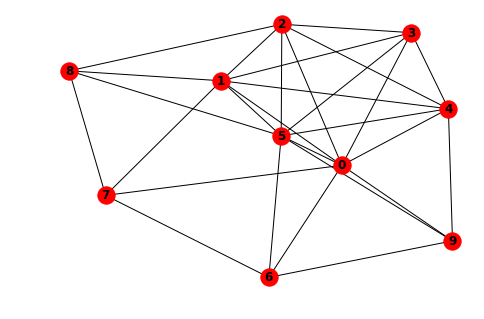

G_1 is


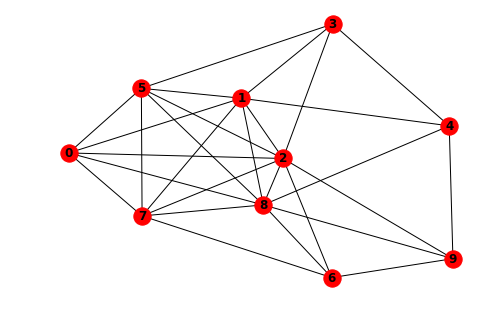

[// Generated by graph-tools (version 1.0) at 2020/56/05/09/20 22:56:39
 // undirected, 10 vertices, 28 edges
 graph export_dot {
   node [color=gray90,style=filled];
   "0";
   "1";
   "2";
   "3";
   "4";
   "5";
   "6";
   "7";
   "8";
   "9";
   "0" -- "2";
   "0" -- "3";
   "0" -- "5";
   "0" -- "6";
   "0" -- "7";
   "0" -- "9";
   "1" -- "2";
   "1" -- "4";
   "1" -- "7";
   "1" -- "9";
   "2" -- "3";
   "2" -- "5";
   "2" -- "6";
   "2" -- "7";
   "2" -- "8";
   "2" -- "9";
   "3" -- "4";
   "3" -- "5";
   "3" -- "6";
   "3" -- "7";
   "3" -- "8";
   "3" -- "9";
   "4" -- "7";
   "4" -- "8";
   "5" -- "7";
   "5" -- "9";
   "6" -- "8";
   "7" -- "9";
 }, 1, array([5, 7, 2, 1, 4, 9, 6, 0, 3, 8]), 'Accept']

In [118]:
print('G_0 is')
plot_graph(AM)
print('G_1 is')
plot_graph(AM1)
simulator(AM,AM1)